# Analyze the latent constructs
For the thesis I definded the following 3 latent constructs to implement in the choice model:
- Natural hazard vulnerability
- Financialy vulnerability
- Psychological distance

With an explanatory factor analysis (EFA) I will first find out if the attributes I chose as descriptors for these latent constructs are correlated. And secondly, I will do a latent profile analysis (LPA) with the remaining attributes to define how many subgroups (values) I will define per latent construct.

In [5]:
# ------------------------------------------------------------------
# Load Libraries & Data
# ------------------------------------------------------------------
import os
print(os.getcwd())
import importlib

import re
import pandas as pd
import numpy as np

import numpy.linalg as la
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer

import matplotlib.pyplot as plt

import f_statistics as stat
stat = importlib.reload(stat)
import f_data_processing as dp


c:\Users\stdt\ETH Zurich\PhD Veronika - 07_Master Thesis Natalie\10_hcm_code\natural_hazard_solidarity


In [6]:
df = pd.read_csv('../results/combined_surveys.csv', index_col=0)
# TODO: switch lreco_2 from S1 to costs_cc_policy_1 -> same quesiton at least in english pdf

In [ ]:
df

0      6.0
1      6.0
2      5.0
3      3.0
4      4.0
      ... 
498    6.0
499    5.0
500    4.0
501    6.0
502    5.0
Name: S0_costs_cc_policy_1, Length: 503, dtype: float64

In [ ]:
# prepare the latent construct variables
attributes = ['S1_psycho_distance_1', 'S1_psycho_distance_2', 'S1_psycho_distance_3', 'S1_psycho_distance_4', 
              'S0_income', 'S1_finan_vulnerability', 'S1_costs_cc_policy_1',
              'S0_experience_nh', 'S1_sensitivity_nh_1', 'S1_sensitivity_nh_2', 'S1_sensitivity_nh_3', 'S1_climatechange_nh_1']

print(pd.unique(df['S0_income']))



[nan  6.  3.  5.  4.  2.  1.]


### Psychological distance

In [ ]:
construct = 'Psychological distance'
cols = ['S1_psycho_distance_1', 'S1_psycho_distance_2', 'S1_psycho_distance_3', 'S1_psycho_distance_4'] # 2, 2, 2, 2
X = df[cols].copy()

# Missing handling (simpel)
X = X.dropna()

Z = StandardScaler().fit_transform(X)
Z = pd.DataFrame(Z, columns=cols, index=X.index)

# EFA diagnostics KMO and Bartlett
kmo_all, kmo_model = calculate_kmo(Z)
chi2, p = calculate_bartlett_sphericity(Z)

print('KMO (model):', kmo_model)
print('Bartlett chi2:', chi2, 'p:', p)

# check factor number
corr = Z.corr().values
eigvals = la.eigvals(corr)
print('Eigenvalues:', np.sort(eigvals)[::-1])

# fit EFA
fa = FactorAnalyzer(n_factors=1, rotation=None, method='ml')  # None bc only one factor, 'ml' or 'principal'
fa.fit(Z)

loadings = pd.DataFrame(fa.loadings_, index=cols, columns=[''])
phi = pd.DataFrame(fa.phi_, index=loadings.columns, columns=loadings.columns)

communalities = pd.Series(fa.get_communalities(), index=cols, name='h2')
uniqueness = pd.Series(fa.get_uniquenesses(), index=cols, name='u2')

print(loadings)
print(communalities)
print(uniqueness)

KMO (model): 0.5507178412777982
Bartlett chi2: 335.9853559395072 p: 1.5719109710321683e-69
Eigenvalues: [1.86146192 1.06400957 0.79030695 0.28422155]
                              
S1_psycho_distance_1 -0.298920
S1_psycho_distance_2 -0.798589
S1_psycho_distance_3  0.011369
S1_psycho_distance_4 -0.892928
S1_psycho_distance_1    0.089353
S1_psycho_distance_2    0.637744
S1_psycho_distance_3    0.000129
S1_psycho_distance_4    0.797320
Name: h2, dtype: float64
S1_psycho_distance_1    0.910647
S1_psycho_distance_2    0.362256
S1_psycho_distance_3    0.999871
S1_psycho_distance_4    0.202680
Name: u2, dtype: float64


c:\Users\stdt\ETH Zurich\PhD Veronika - 07_Master Thesis Natalie\10_hcm_code\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


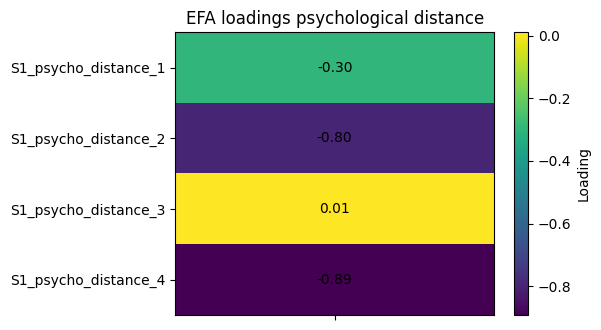

In [54]:
fig, ax = plt.subplots(figsize=(6, 0.35*len(loadings)+2))
im = ax.imshow(loadings.values, aspect="auto")

ax.set_xticks(range(loadings.shape[1]))
ax.set_xticklabels(loadings.columns)
ax.set_yticks(range(loadings.shape[0]))
ax.set_yticklabels(loadings.index)

for i in range(loadings.shape[0]):
    for j in range(loadings.shape[1]):
        ax.text(j, i, f"{loadings.iat[i,j]:.2f}", ha="center", va="center")

plt.colorbar(im, ax=ax, label="Loading")
ax.set_title("EFA loadings psychological distance")
plt.tight_layout()
plt.show()


### Financial vulnerability

In [ ]:
construct = 'Financial vulnerability'
cols = ['S0_income', 'S1_finan_vulnerability', 'S0_costs_cc_policy_1'] # y, y, 1 S0_costs_cc_policy_1 = S1_lreco_2
X = df[cols].copy()

# # Einkommen oft schief → log-Transform (robust)
# X['income_pc'] = np.log1p(X['income_pc'])

# Missing handling (simpel)
X = X.dropna()

Z = StandardScaler().fit_transform(X)
Z = pd.DataFrame(Z, columns=cols, index=X.index)

# EFA diagnostics KMO and Bartlett
kmo_all, kmo_model = calculate_kmo(Z)
chi2, p = calculate_bartlett_sphericity(Z)

print('KMO (model):', kmo_model)
print('Bartlett chi2:', chi2, 'p:', p)

# check factor number
corr = Z.corr().values
eigvals = la.eigvals(corr)
print('Eigenvalues:', np.sort(eigvals)[::-1])

# fit EFA
fa = FactorAnalyzer(n_factors=1, rotation=None, method='ml')  # None bc only one factor, 'ml' or 'principal'
fa.fit(Z)

loadings = pd.DataFrame(fa.loadings_, index=cols, columns=[''])
phi = pd.DataFrame(fa.phi_, index=loadings.columns, columns=loadings.columns)

communalities = pd.Series(fa.get_communalities(), index=cols, name='h2')
uniqueness = pd.Series(fa.get_uniquenesses(), index=cols, name='u2')

print(loadings)
print(communalities)
print(uniqueness)

['S0_costs_cc_policy_1', 'S0_income', 'S1_finan_vulnerability_1']
     S0_costs_cc_policy_1  S0_income  S1_finan_vulnerability_1
0                     6.0        NaN                       4.0
1                     6.0        6.0                       6.0
2                     5.0        3.0                       3.0
3                     3.0        5.0                       3.0
4                     4.0        4.0                       3.0
..                    ...        ...                       ...
498                   6.0        6.0                       3.0
499                   5.0        4.0                       3.0
500                   4.0        4.0                       4.0
501                   6.0        5.0                       1.0
502                   5.0        5.0                       4.0

[503 rows x 3 columns]
KMO (model): 0.5786818537537766
Bartlett chi2: 170.4872404633975 p: 9.987975026571028e-37
Eigenvalues: [1.72192524 0.82471717 0.45335759]
                

c:\Users\stdt\ETH Zurich\PhD Veronika - 07_Master Thesis Natalie\10_hcm_code\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


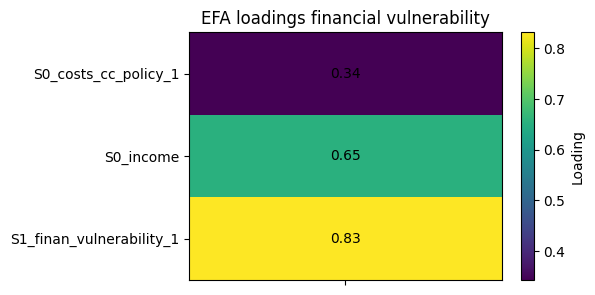

In [61]:
fig, ax = plt.subplots(figsize=(6, 0.35*len(loadings)+2))
im = ax.imshow(loadings.values, aspect="auto")

ax.set_xticks(range(loadings.shape[1]))
ax.set_xticklabels(loadings.columns)
ax.set_yticks(range(loadings.shape[0]))
ax.set_yticklabels(loadings.index)

for i in range(loadings.shape[0]):
    for j in range(loadings.shape[1]):
        ax.text(j, i, f"{loadings.iat[i,j]:.2f}", ha="center", va="center")

plt.colorbar(im, ax=ax, label="Loading")
ax.set_title("EFA loadings financial vulnerability")
plt.tight_layout()
plt.show()


### Natural hazard vulnerability

In [13]:
construct = 'Natural hazard vulnerability'
cols = ['S0_experience_nh', 'S1_sensitivity_nh_1', 'S1_sensitivity_nh_2', 'S1_sensitivity_nh_3', 'S1_climatechange_nh_1'] # 1, y, y, y, y
X = df[cols].copy()
print(X)

# Missing handling (simpel)
X = X.dropna()

Z = StandardScaler().fit_transform(X)
Z = pd.DataFrame(Z, columns=cols, index=X.index)

# EFA diagnostics KMO and Bartlett
kmo_all, kmo_model = calculate_kmo(Z)
chi2, p = calculate_bartlett_sphericity(Z)

print('KMO (model):', kmo_model)
print('Bartlett chi2:', chi2, 'p:', p)

# check factor number
corr = Z.corr().values
eigvals = la.eigvals(corr)
print('Eigenvalues:', np.sort(eigvals)[::-1])

# fit EFA
fa = FactorAnalyzer(n_factors=1, rotation=None, method='ml')  # None bc only one factor, 'ml' or 'principal'
fa.fit(Z)

loadings = pd.DataFrame(fa.loadings_, index=cols, columns=[''])
phi = pd.DataFrame(fa.phi_, index=loadings.columns, columns=loadings.columns)

communalities = pd.Series(fa.get_communalities(), index=cols, name='h2')
uniqueness = pd.Series(fa.get_uniquenesses(), index=cols, name='u2')

print(loadings)
print(communalities)
print(uniqueness)

     S0_experience_nh  S1_sensitivity_nh_1  S1_sensitivity_nh_2  \
0                 0.0                  3.0                  3.0   
1                 1.0                  5.0                  5.0   
2                 1.0                  2.0                  2.0   
3                 1.0                  1.0                  2.0   
4                 0.0                  5.0                  5.0   
..                ...                  ...                  ...   
498               1.0                  1.0                  3.0   
499               1.0                  4.0                  5.0   
500               1.0                  3.0                  3.0   
501               0.0                  6.0                  5.0   
502               1.0                  6.0                  6.0   

     S1_sensitivity_nh_3  S1_climatechange_nh_1  
0                    3.0                    3.0  
1                    4.0                    1.0  
2                    2.0                    4

c:\Users\stdt\ETH Zurich\PhD Veronika - 07_Master Thesis Natalie\10_hcm_code\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


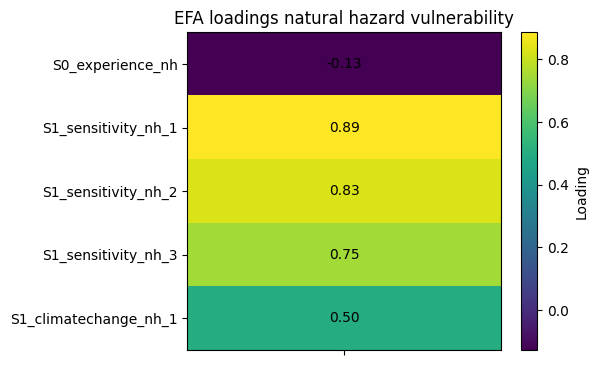

In [14]:
fig, ax = plt.subplots(figsize=(6, 0.35*len(loadings)+2))
im = ax.imshow(loadings.values, aspect="auto")

ax.set_xticks(range(loadings.shape[1]))
ax.set_xticklabels(loadings.columns)
ax.set_yticks(range(loadings.shape[0]))
ax.set_yticklabels(loadings.index)

for i in range(loadings.shape[0]):
    for j in range(loadings.shape[1]):
        ax.text(j, i, f"{loadings.iat[i,j]:.2f}", ha="center", va="center")

plt.colorbar(im, ax=ax, label="Loading")
ax.set_title("EFA loadings natural hazard vulnerability")
plt.tight_layout()
plt.show()
